## Data Cleaning (Key Indicator State and Districtwise Data Directory)

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()

'/home/rc/capstone/notebooks/data-cleaning'

In [ ]:
# Checking env/venv dependencies
#%pip install seaborn
#import seaborn as sns; print("seaborn", sns.__version__)

In [2]:
os.chdir('../../data/Key_Indicator_State_and_District_wise_data')
!ls

AA_Sample_Particulars_District.csv
AA_Sample_Particulars_State.csv
BB_Household_Characteristics_District.csv
BB_Household_Characteristics_State.csv
CC_Sex_Ratio_District.csv
CC_Sex_Ratio_State.csv
DD_Effective_Literacy_Rate_District.csv
DD_Effective_Literacy_Rate_State.csv
EE_Marriage_District.csv
EE_Marriage_State.csv
FF_Schooling_Status_District.csv
FF_Schooling_Status_State.csv
GG_Work_Status_District.csv
GG_Work_Status_State.csv
HH_Disability_District.csv
HH_Disability_State.csv
II_Injury_District.csv
II_Injury_State.csv
JJ_Acute_Illness_District.csv
JJ_Acute_Illness_State.csv
KK_Chronic_Illness_District.csv
KK_Chronic_Illness_State.csv
Key_Indicator_State_and_District_wise_data
LL_Fertility_District.csv
LL_Fertility_State.csv
MM_Abortion_District.csv
MM_Abortion_State.csv
NN_Family_Planning_Practices_Cmw_Aged_15_49_Years_District.csv
NN_Family_Planning_Practices_Cmw_Aged_15_49_Years_State.csv
OO_Unmet_Need_For_Family_Planning_District.csv
OO_Unmet_Need_For_Family_Planning_State.cs

In [3]:
# check disk size of directory and combined size of the nested csv data files
!du -sh

2.6M	.


In [4]:
# Load a sample csv dataset from Key_Indicator_State_and_District_wise_data source directory
df = pd.read_csv('YY_Mortality_District.csv')

# Removes all letter prefixes eg AA_ - ZZ_ from feature columns
df.columns = [re.sub(r'^[A-Z]{2}_', '', col) for col in df.columns]

# Check features from sample csv data
df.head()

,State_Name,State_District_Name,Crude_Death_Rate_Cdr_Total_Person,Crude_Death_Rate_Cdr_Total_Male,Crude_Death_Rate_Cdr_Total_Female,Crude_Death_Rate_Cdr_Rural_Person,Crude_Death_Rate_Cdr_Rural_Male,Crude_Death_Rate_Cdr_Rural_Female,Crude_Death_Rate_Cdr_Urban_Person,Crude_Death_Rate_Cdr_Urban_Male,...,Post_Neo_Natal_Mortality_Rate_Urban,Under_Five_Mortality_Rate_U5MR_Total_Person,Under_Five_Mortality_Rate_U5MR_Total_Male,Under_Five_Mortality_Rate_U5MR_Total_Female,Under_Five_Mortality_Rate_U5MR_Rural_Person,Under_Five_Mortality_Rate_U5MR_Rural_Male,Under_Five_Mortality_Rate_U5MR_Rural_Female,Under_Five_Mortality_Rate_U5MR_Urban_Person,Under_Five_Mortality_Rate_U5MR_Urban_Male,Under_Five_Mortality_Rate_U5MR_Urban_Female
0,Assam,Barpeta,6.6,8.1,5.1,6.7,8.1,5.3,6.1,8.7,...,NaN,58,68,48,62,70,53,NaN,NaN,NaN
1,Assam,Bongaigaon,6.1,7.8,4.4,6.3,8.0,4.5,5.0,6.3,...,NaN,61,60,62,65,65,66,NaN,NaN,NaN
2,Assam,Cachar,7.3,8.2,6.3,7.4,8.3,6.5,6.5,7.7,...,16.0,69,68,70,74,73,75,44.0,44.0,43.0
3,Assam,Darrang,8.1,8.4,7.7,8.1,8.5,7.8,6.9,6.8,...,NaN,91,92,91,93,93,93,NaN,NaN,NaN
4,Assam,Dhemaji,4.5,5.3,3.7,4.5,5.3,3.7,4.2,5.2,...,12.0,45,44,46,47,44,49,25.0,36.0,12.0


In [5]:
df.shape # 284 districts 35 features in this sample AHS csv data file

(284, 35)

In [6]:
# List of 35 feature columns
print(df.columns.tolist())

['State_Name', 'State_District_Name', 'Crude_Death_Rate_Cdr_Total_Person', 'Crude_Death_Rate_Cdr_Total_Male', 'Crude_Death_Rate_Cdr_Total_Female', 'Crude_Death_Rate_Cdr_Rural_Person', 'Crude_Death_Rate_Cdr_Rural_Male', 'Crude_Death_Rate_Cdr_Rural_Female', 'Crude_Death_Rate_Cdr_Urban_Person', 'Crude_Death_Rate_Cdr_Urban_Male', 'Crude_Death_Rate_Cdr_Urban_Female', 'Infant_Mortality_Rate_Imr_Total_Person', 'Infant_Mortality_Rate_Imr_Total_Male', 'Infant_Mortality_Rate_Imr_Total_Female', 'Infant_Mortality_Rate_Imr_Rural_Person', 'Infant_Mortality_Rate_Imr_Rural_Male', 'Infant_Mortality_Rate_Imr_Rural_Female', 'Infant_Mortality_Rate_Imr_Urban_Person', 'Infant_Mortality_Rate_Imr_Urban_Male', 'Infant_Mortality_Rate_Imr_Urban_Female', 'Neo_Natal_Mortality_Rate_Total', 'Neo_Natal_Mortality_Rate_Rural', 'Neo_Natal_Mortality_Rate_Urban', 'Post_Neo_Natal_Mortality_Rate_Total', 'Post_Neo_Natal_Mortality_Rate_Rural', 'Post_Neo_Natal_Mortality_Rate_Urban', 'Under_Five_Mortality_Rate_U5MR_Total_Person

In [7]:
df.describe()

,Crude_Death_Rate_Cdr_Total_Person,Crude_Death_Rate_Cdr_Total_Male,Crude_Death_Rate_Cdr_Total_Female,Crude_Death_Rate_Cdr_Rural_Person,Crude_Death_Rate_Cdr_Rural_Male,Crude_Death_Rate_Cdr_Rural_Female,Crude_Death_Rate_Cdr_Urban_Person,Crude_Death_Rate_Cdr_Urban_Male,Crude_Death_Rate_Cdr_Urban_Female,Infant_Mortality_Rate_Imr_Total_Person,...,Post_Neo_Natal_Mortality_Rate_Urban,Under_Five_Mortality_Rate_U5MR_Total_Person,Under_Five_Mortality_Rate_U5MR_Total_Male,Under_Five_Mortality_Rate_U5MR_Total_Female,Under_Five_Mortality_Rate_U5MR_Rural_Person,Under_Five_Mortality_Rate_U5MR_Rural_Male,Under_Five_Mortality_Rate_U5MR_Rural_Female,Under_Five_Mortality_Rate_U5MR_Urban_Person,Under_Five_Mortality_Rate_U5MR_Urban_Male,Under_Five_Mortality_Rate_U5MR_Urban_Female
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,281.000000,281.000000,281.000000,284.000000,...,191.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,192.000000,192.000000,192.000000
mean,7.474683,7.982676,6.961796,7.775704,8.276972,7.268697,6.244021,6.748114,5.710890,56.178028,...,14.750314,75.595070,72.387324,79.098592,80.228873,76.855634,83.978873,55.026042,51.854167,58.468750
std,1.492389,1.568370,1.566156,1.520421,1.601718,1.594015,1.495092,1.711049,1.581413,14.094372,...,7.200222,20.020169,19.259011,21.647615,20.507357,19.772834,22.404558,18.458226,19.390168,22.640118
min,4.100000,4.500000,3.600000,4.100000,4.600000,3.600000,3.270000,3.300000,2.150000,19.220000,...,2.670000,24.000000,24.000000,24.000000,25.000000,24.000000,25.000000,11.000000,10.000000,12.000000
25%,6.307500,6.825000,5.800000,6.700000,7.182500,6.100000,5.200000,5.700000,4.700000,47.950000,...,10.000000,62.000000,59.000000,65.750000,67.000000,65.000000,69.000000,41.750000,39.000000,43.000000
50%,7.440000,7.900000,6.925000,7.620000,8.200000,7.200000,6.000000,6.590000,5.500000,55.000000,...,13.200000,76.000000,72.000000,79.500000,79.000000,76.000000,85.000000,53.000000,49.500000,55.000000
75%,8.500000,8.892500,7.935000,8.800000,9.315000,8.307500,7.100000,7.600000,6.600000,65.180000,...,18.895000,88.250000,86.000000,92.000000,93.000000,90.000000,97.250000,64.250000,62.000000,70.250000
max,12.100000,12.900000,11.800000,12.160000,13.400000,12.300000,13.400000,15.300000,11.400000,97.000000,...,46.580000,139.000000,132.000000,147.000000,146.000000,139.000000,154.000000,109.000000,136.000000,134.000000


In [8]:
# Verify all 9 states from AHS survey are accounted for
states = list(df.State_Name.unique())
print(len(states))
states

9


['Assam',
 'Bihar',
 'Chhattisgarh',
 'Jharkhand',
 'Madhya Pradesh',
 'Odisha',
 'Rajasthan',
 'Uttar Pradesh',
 'Uttarakhand']

In [12]:
# Check null values
# Null count per feature (overall)
null_counts = df.isnull().sum()

print("Null counts per feature:")
print(null_counts[null_counts > 0])
print("\nTotal null count across all features:")
print(null_counts[null_counts > 0].sum()) 

Null counts per feature:
Crude_Death_Rate_Cdr_Urban_Person               3
Crude_Death_Rate_Cdr_Urban_Male                 3
Crude_Death_Rate_Cdr_Urban_Female               3
Infant_Mortality_Rate_Imr_Urban_Person         92
Infant_Mortality_Rate_Imr_Urban_Male           92
Infant_Mortality_Rate_Imr_Urban_Female         92
Neo_Natal_Mortality_Rate_Urban                 92
Post_Neo_Natal_Mortality_Rate_Urban            93
Under_Five_Mortality_Rate_U5MR_Urban_Person    92
Under_Five_Mortality_Rate_U5MR_Urban_Male      92
Under_Five_Mortality_Rate_U5MR_Urban_Female    92
dtype: int64

Total null count across all features:
746


In [14]:
nulls_long = (
    df.drop(columns=["State_District_Name"])
      .isnull()
      .groupby(df["State_District_Name"])
      .sum()
      .reset_index()
      .melt(id_vars="State_District_Name", var_name="Feature", value_name="Null_Count")
)

nulls_long.head()

,State_District_Name,Feature,Null_Count
0,Agra,State_Name,0
1,Ajmer,State_Name,0
2,Aligarh,State_Name,0
3,Allahabad,State_Name,0
4,Almora,State_Name,0


In [15]:
nulls_long.tail() 

,State_District_Name,Feature,Null_Count
9651,Uttarkashi,Under_Five_Mortality_Rate_U5MR_Urban_Female,0
9652,Vaishali,Under_Five_Mortality_Rate_U5MR_Urban_Female,0
9653,Varanasi,Under_Five_Mortality_Rate_U5MR_Urban_Female,0
9654,Vidisha,Under_Five_Mortality_Rate_U5MR_Urban_Female,0
9655,West Nimar,Under_Five_Mortality_Rate_U5MR_Urban_Female,0


In [16]:
# Generate a list of all features
features_df = pd.DataFrame({"Feature": df.columns})
print(features_df.head(35))

                                        Feature
0                                    State_Name
1                           State_District_Name
2             Crude_Death_Rate_Cdr_Total_Person
3               Crude_Death_Rate_Cdr_Total_Male
4             Crude_Death_Rate_Cdr_Total_Female
5             Crude_Death_Rate_Cdr_Rural_Person
6               Crude_Death_Rate_Cdr_Rural_Male
7             Crude_Death_Rate_Cdr_Rural_Female
8             Crude_Death_Rate_Cdr_Urban_Person
9               Crude_Death_Rate_Cdr_Urban_Male
10            Crude_Death_Rate_Cdr_Urban_Female
11       Infant_Mortality_Rate_Imr_Total_Person
12         Infant_Mortality_Rate_Imr_Total_Male
13       Infant_Mortality_Rate_Imr_Total_Female
14       Infant_Mortality_Rate_Imr_Rural_Person
15         Infant_Mortality_Rate_Imr_Rural_Male
16       Infant_Mortality_Rate_Imr_Rural_Female
17       Infant_Mortality_Rate_Imr_Urban_Person
18         Infant_Mortality_Rate_Imr_Urban_Male
19       Infant_Mortality_Rate_Imr_Urban

In [17]:
 ## Checking the range of the target variable
print(df.Infant_Mortality_Rate_Imr_Total_Person.min())
print(df.Infant_Mortality_Rate_Imr_Total_Person.max())

19.22
97.0


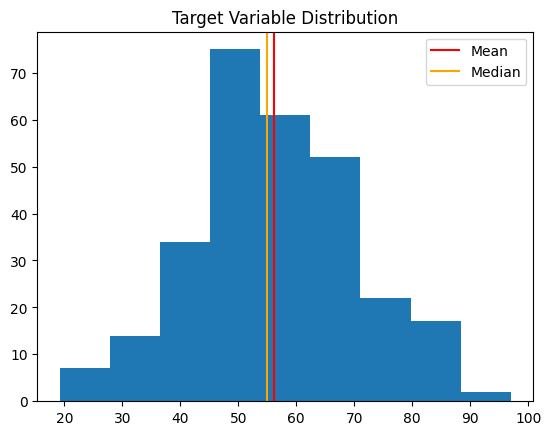

In [18]:
## Target Variable Distribution
plt.hist(df.Infant_Mortality_Rate_Imr_Total_Person, bins=9)
plt.axvline(df.Infant_Mortality_Rate_Imr_Total_Person.mean(), color='red', label='Mean')
plt.axvline(df.Infant_Mortality_Rate_Imr_Total_Person.median(), color='orange', label = 'Median')
plt.title('Target Variable Distribution'), plt.legend()
plt.show()

In [19]:
## Correlation overview
df.select_dtypes(include='number').corr()

,Crude_Death_Rate_Cdr_Total_Person,Crude_Death_Rate_Cdr_Total_Male,Crude_Death_Rate_Cdr_Total_Female,Crude_Death_Rate_Cdr_Rural_Person,Crude_Death_Rate_Cdr_Rural_Male,Crude_Death_Rate_Cdr_Rural_Female,Crude_Death_Rate_Cdr_Urban_Person,Crude_Death_Rate_Cdr_Urban_Male,Crude_Death_Rate_Cdr_Urban_Female,Infant_Mortality_Rate_Imr_Total_Person,...,Post_Neo_Natal_Mortality_Rate_Urban,Under_Five_Mortality_Rate_U5MR_Total_Person,Under_Five_Mortality_Rate_U5MR_Total_Male,Under_Five_Mortality_Rate_U5MR_Total_Female,Under_Five_Mortality_Rate_U5MR_Rural_Person,Under_Five_Mortality_Rate_U5MR_Rural_Male,Under_Five_Mortality_Rate_U5MR_Rural_Female,Under_Five_Mortality_Rate_U5MR_Urban_Person,Under_Five_Mortality_Rate_U5MR_Urban_Male,Under_Five_Mortality_Rate_U5MR_Urban_Female
Crude_Death_Rate_Cdr_Total_Person,1.000000,0.958599,0.960431,0.971694,0.923767,0.930111,0.721733,0.673942,0.637406,0.680330,...,0.204758,0.687892,0.675411,0.673879,0.643600,0.633854,0.617330,0.485777,0.436970,0.418474
Crude_Death_Rate_Cdr_Total_Male,0.958599,1.000000,0.843967,0.934629,0.971711,0.815078,0.680139,0.691636,0.536973,0.606216,...,0.138478,0.582718,0.591952,0.551350,0.544188,0.555163,0.501723,0.382481,0.353621,0.320708
Crude_Death_Rate_Cdr_Total_Female,0.960431,0.843967,1.000000,0.929118,0.804533,0.966247,0.700199,0.597391,0.682322,0.694137,...,0.260901,0.730090,0.697390,0.734081,0.681191,0.652187,0.672652,0.556117,0.489960,0.488445
Crude_Death_Rate_Cdr_Rural_Person,0.971694,0.934629,0.929118,1.000000,0.951543,0.953650,0.632095,0.597699,0.549328,0.664542,...,0.153110,0.664014,0.651350,0.651510,0.664980,0.651395,0.642287,0.420333,0.387879,0.354098
Crude_Death_Rate_Cdr_Rural_Male,0.923767,0.971711,0.804533,0.951543,1.000000,0.816781,0.580084,0.586049,0.462908,0.592342,...,0.097911,0.557953,0.568031,0.527262,0.557615,0.569821,0.514209,0.320275,0.297127,0.270141
Crude_Death_Rate_Cdr_Rural_Female,0.930111,0.815078,0.966247,0.953650,0.816781,1.000000,0.626476,0.556747,0.583785,0.670961,...,0.196017,0.700803,0.666718,0.707659,0.699698,0.661748,0.699890,0.481446,0.441699,0.406158
Crude_Death_Rate_Cdr_Urban_Person,0.721733,0.680139,0.700199,0.632095,0.580084,0.626476,1.000000,0.920825,0.894845,0.444121,...,0.267127,0.430462,0.419370,0.424092,0.376566,0.364661,0.367387,0.517780,0.473957,0.438075
Crude_Death_Rate_Cdr_Urban_Male,0.673942,0.691636,0.597391,0.597699,0.586049,0.556747,0.920825,1.000000,0.650817,0.352852,...,0.190144,0.322962,0.327110,0.306357,0.284485,0.278882,0.272483,0.402786,0.405733,0.302484
Crude_Death_Rate_Cdr_Urban_Female,0.637406,0.536973,0.682322,0.549328,0.462908,0.583785,0.894845,0.650817,1.000000,0.458912,...,0.312806,0.465629,0.439389,0.472064,0.403564,0.387421,0.399021,0.565681,0.471690,0.526112
Infant_Mortality_Rate_Imr_Total_Person,0.680330,0.606216,0.694137,0.664542,0.592342,0.670961,0.444121,0.352852,0.458912,1.000000,...,0.357586,0.920891,0.910010,0.897271,0.893058,0.877570,0.862920,0.638783,0.624172,0.504892


In [ ]:
# Ordered correlation with target var
target_corr = dict(df.select_dtypes(include='number').corr()['Infant_Mortality_Rate_Imr_Total_Person'])
sorted(target_corr.items(), key = lambda item: item[1])

In [20]:
# Columns representing totals
col_totals=[]
for c in df.columns:
    if 'Total' in c:
        col_totals.append(c)
col_totals

['Crude_Death_Rate_Cdr_Total_Person',
 'Crude_Death_Rate_Cdr_Total_Male',
 'Crude_Death_Rate_Cdr_Total_Female',
 'Infant_Mortality_Rate_Imr_Total_Person',
 'Infant_Mortality_Rate_Imr_Total_Male',
 'Infant_Mortality_Rate_Imr_Total_Female',
 'Neo_Natal_Mortality_Rate_Total',
 'Post_Neo_Natal_Mortality_Rate_Total',
 'Under_Five_Mortality_Rate_U5MR_Total_Person',
 'Under_Five_Mortality_Rate_U5MR_Total_Male',
 'Under_Five_Mortality_Rate_U5MR_Total_Female']

In [21]:
def nullcount(df):
    nullcounts={}
    for col in df:
        nullcounts[col] = df[col].isnull().sum()
    return nullcounts

In [22]:
## Null values for each feature with nulls
null_counts = nullcount(df)
has_null = dict()
for k,v in null_counts.items():
    if v>0:
        has_null[k]=v
sorted(has_null.items(), key = lambda item: item[1])

[('Crude_Death_Rate_Cdr_Urban_Person', np.int64(3)),
 ('Crude_Death_Rate_Cdr_Urban_Male', np.int64(3)),
 ('Crude_Death_Rate_Cdr_Urban_Female', np.int64(3)),
 ('Infant_Mortality_Rate_Imr_Urban_Person', np.int64(92)),
 ('Infant_Mortality_Rate_Imr_Urban_Male', np.int64(92)),
 ('Infant_Mortality_Rate_Imr_Urban_Female', np.int64(92)),
 ('Neo_Natal_Mortality_Rate_Urban', np.int64(92)),
 ('Under_Five_Mortality_Rate_U5MR_Urban_Person', np.int64(92)),
 ('Under_Five_Mortality_Rate_U5MR_Urban_Male', np.int64(92)),
 ('Under_Five_Mortality_Rate_U5MR_Urban_Female', np.int64(92)),
 ('Post_Neo_Natal_Mortality_Rate_Urban', np.int64(93))]

In [23]:
## Number of features with nulls
len(has_null)

11

### Correlation to Target Variable

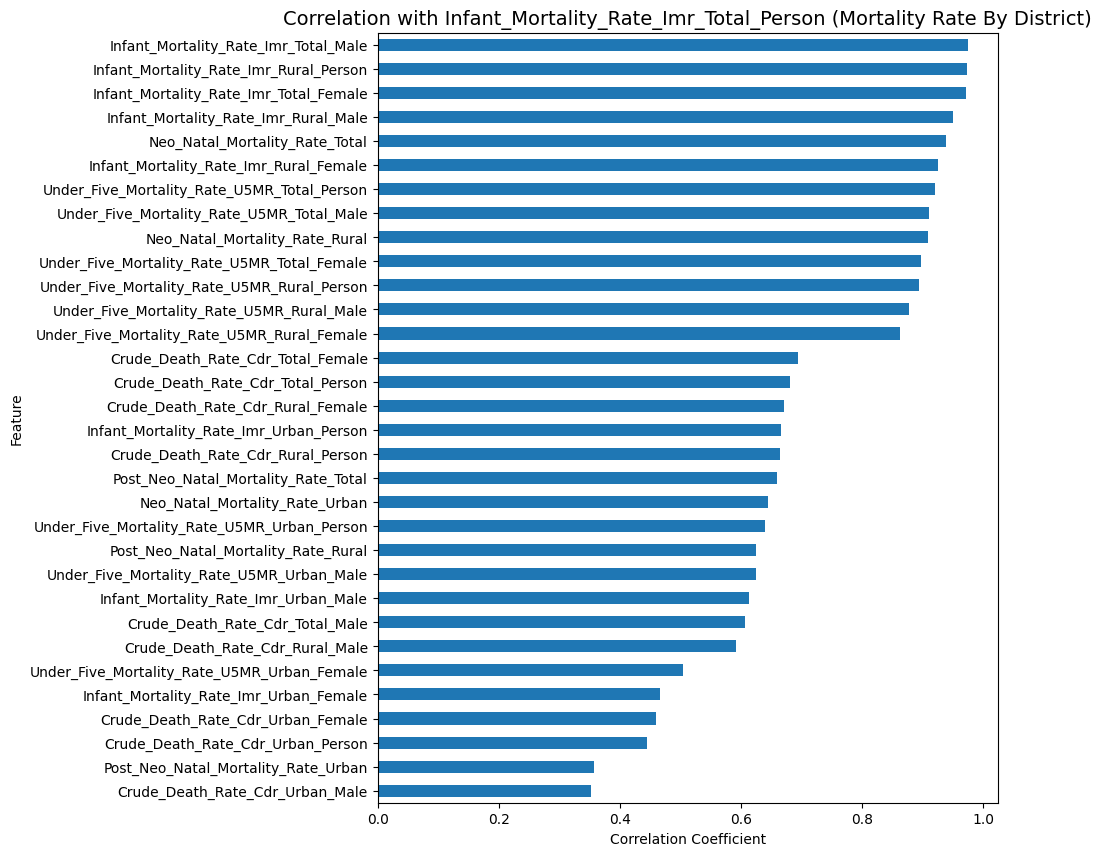

In [24]:
import matplotlib.pyplot as plt

# Get correlations with target
target = 'Infant_Mortality_Rate_Imr_Total_Person'
corr = (
    df.select_dtypes(include='number')
      .corr()[target]
      .drop(target)  # drop self-correlation
      .sort_values()
)

# Plot
plt.figure(figsize=(8, 10))
corr.plot(kind='barh')
plt.title(f'Correlation with {target} (Mortality Rate By District)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

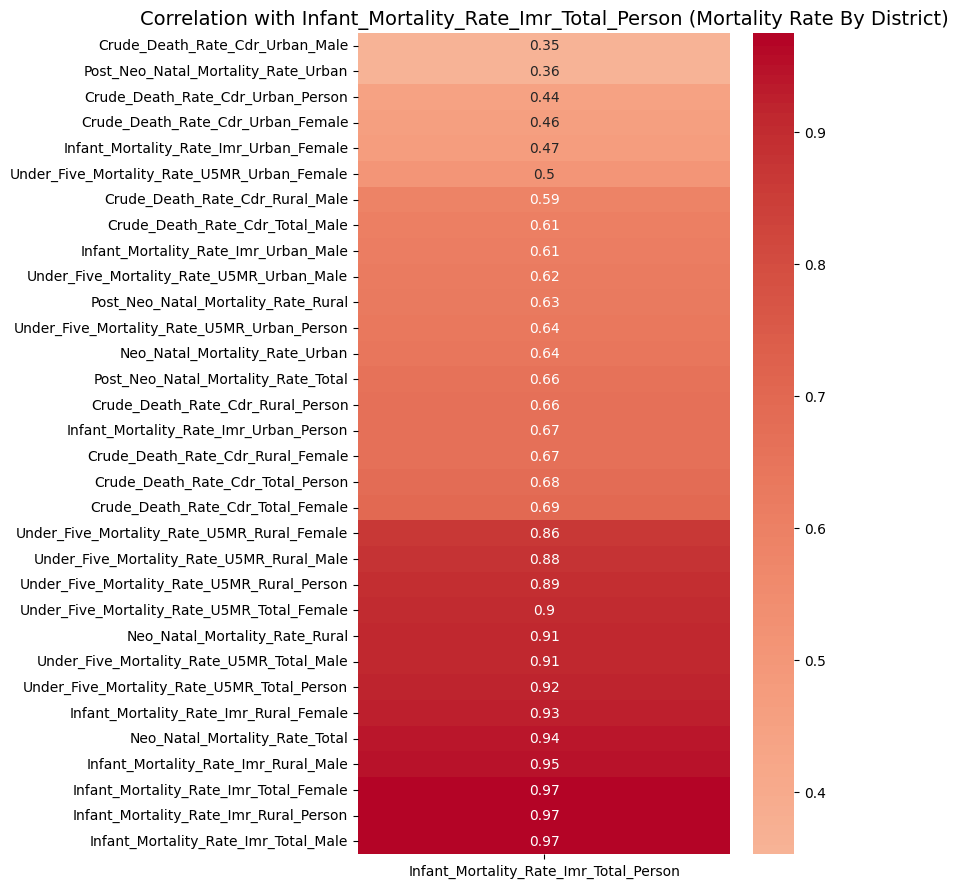

In [25]:
import seaborn as sns

plt.figure(figsize=(6, len(corr)/3))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation with {target} (Mortality Rate By District)', fontsize=14)
plt.show()